In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('dataset_tiktok-comments-scraper.csv', sep=';')

df.head()

,avatarThumbnail,cid,createTime,createTimeISO,diggCount,input,likedByAuthor,pinnedByAuthor,repliesToId,replyCommentTotal,submittedVideoUrl,text,uid,uniqueId,videoWebUrl
0,https://p16-common-sign-useast2a.tiktokcdn-us....,"7,50004E+18",1746239569,2025-05-03T02:32:49.000Z,0.0,https://www.tiktok.com/@moodieyes/video/749972...,False,False,NaN,0.0,https://www.tiktok.com/@moodieyes/video/749972...,proud to be part of PMM4 thank you so much pak...,"7,04075E+18",sbrnspace,https://www.tiktok.com/@moodieyes/video/749972...
1,https://p16-common-sign-va.tiktokcdn-us.com/to...,"7,50043E+18",1746329198,2025-05-04T03:26:38.000Z,0.0,https://www.tiktok.com/@moodieyes/video/749972...,False,False,NaN,0.0,https://www.tiktok.com/@moodieyes/video/749972...,greatest loss.,"2,59775E+17",scrmncryn,https://www.tiktok.com/@moodieyes/video/749972...
2,https://p16-common-sign-va.tiktokcdn-us.com/to...,"7,50087E+18",1746431755,2025-05-05T07:55:55.000Z,0.0,https://www.tiktok.com/@moodieyes/video/749972...,False,False,NaN,0.0,https://www.tiktok.com/@moodieyes/video/749972...,take me backk 🙇🏻🙇🏻🙇🏻🙇🏻,"6,87721E+18",_imyourangellll,https://www.tiktok.com/@moodieyes/video/749972...
3,https://p16-common-sign-va.tiktokcdn-us.com/to...,"7,49989E+18",1746204264,2025-05-02T16:44:24.000Z,0.0,https://www.tiktok.com/@moodieyes/video/749972...,False,False,NaN,0.0,https://www.tiktok.com/@moodieyes/video/749972...,1st batch here☝️☝️,"7,25159E+18",puja_sabrina,https://www.tiktok.com/@moodieyes/video/749972...
4,https://p16-common-sign-sg.tiktokcdn-us.com/to...,"7,50028E+18",1746295788,2025-05-03T18:09:48.000Z,1.0,https://www.tiktok.com/@moodieyes/video/749972...,False,False,NaN,0.0,https://www.tiktok.com/@moodieyes/video/749972...,goodbye my sweet scar✨🥀,"6,88972E+18",ababetzz,https://www.tiktok.com/@moodieyes/video/749972...


In [3]:
df.drop(columns=[col for col in df.columns if col != 'text'], inplace=True)

df.head()

,text
0,proud to be part of PMM4 thank you so much pak...
1,greatest loss.
2,take me backk 🙇🏻🙇🏻🙇🏻🙇🏻
3,1st batch here☝️☝️
4,goodbye my sweet scar✨🥀


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 668 entries, 0 to 667
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    651 non-null    object
dtypes: object(1)
memory usage: 5.3+ KB


In [5]:
print(df.isnull().sum())  # Menampilkan jumlah nilai null per kolom

text    17
dtype: int64


In [6]:
df = df.dropna()

In [7]:
# Hapus baris yang mengandung NaN di kolom 'text'
df = df.dropna(subset=['text'])

# Hapus baris yang hanya berisi angka atau kosong
df = df[df['text'].str.strip().astype(bool)]  # Menghapus teks kosong atau hanya spasi
df = df[~df['text'].str.isnumeric()]  # Menghapus baris yang hanya berisi angka


In [8]:
print(df.isnull().sum())  # Menampilkan jumlah nilai null per kolom

text    0
dtype: int64


In [9]:
df.head(20)

,text
0,proud to be part of PMM4 thank you so much pak...
1,greatest loss.
2,take me backk 🙇🏻🙇🏻🙇🏻🙇🏻
3,1st batch here☝️☝️
4,goodbye my sweet scar✨🥀
5,hah?
6,couldn't be more grateful to be part of pmm4🥹🥹🥹🥹🥹
7,"Thanks for the opportunity, I can experience s..."
8,glad to be part of pmm 2😭😭
9,PMM 4 MEAN A LOTS FOR MEE 💯💯💯💯❤️❤️❤️❤️


In [10]:
import re
import string
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from deep_translator import GoogleTranslator
import emoji

# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# 1. Load Kamus Slang (Indonesia)
slang_df = pd.read_excel('kamuskatabaku.xlsx')
slang_dict = dict(zip(slang_df['tidak_baku'], slang_df['kata_baku']))

# Kamus slang tambahan untuk variasi umum
additional_slang = {
    'sy' : 'saya',
    'seedih' : 'sedih',
    'pengin' : 'pengen',
    'sadweahae' : 'sedih',
    'wlpn' : 'walaupun',
    'sedyh' : 'sedih',
    'duh' : 'aduh',
    'indak' : 'indah',
    'jagu' : 'jadi',
    'bis' : 'bisa',
    'bis' : 'habis',
    'merasai' : 'merasa'
}
slang_dict.update(additional_slang)

# Kamus terjemahan manual
manual_translations = {
    'take me back': 'bawa saya kembali',
    'take me backk': 'bawa saya kembali',
    'greatest loss': 'kehilangan terbesar',
    'mean a lots for me': 'berarti banyak bagi saya',
    'mean a lot for me': 'berarti banyak bagi saya',
    'mean a lot': 'sangat berarti',
    'thank you so much': 'terima kasih banyak',
    'proud to be part': 'bangga menjadi bagian'
}

# Inisialisasi lemmatizer
lemmatizer = WordNetLemmatizer()

# Normalisasi slang Inggris
def normalize_english_slang(text):
    words = text.split()
    return ' '.join([additional_slang.get(word.lower(), word) for word in words])

# Terjemahan Inggris ke Indonesia (dengan frasa manual)
def translate_to_indonesian(text):
    text_lower = text.lower()
    for phrase, translation in manual_translations.items():
        text_lower = text_lower.replace(phrase, translation)  # Replace frasa manual terlebih dahulu
    try:
        return GoogleTranslator(source='en', target='id').translate(text_lower)
    except:
        return text_lower

# Pembersihan awal (hapus mention, hashtag, URL, dll.)
def combinedCleaning(text):
    if not isinstance(text, str) or not text.strip():
        return ''
    text = emoji.replace_emoji(text, replace='')  # Hapus emoji
    text = re.sub(r'@[A-Za-z0-9_]+', '', text)  # Hapus mention
    text = re.sub(r'#[A-Za-z0-9_]+', '', text)  # Hapus hashtag
    text = re.sub(r'RT[\s]+', '', text)  # Hapus RT
    text = re.sub(r'http\S+', '', text)  # Hapus URL
    text = re.sub(r'[0-9]+', '', text)  # Hapus angka
    text = text.replace('\n', ' ')  # Ganti newline
    text = text.translate(str.maketrans('', '', string.punctuation))  # Hapus tanda baca
    return text.strip()

# Case folding (ubah ke huruf kecil)
def casefoldingText(text):
    if not isinstance(text, str):
        return ''
    return text.lower()

# Ganti kata slang Indonesia dengan kata baku
def replaceSlang(text):
    if not isinstance(text, str) or not text.strip():
        return ''
    words = text.split()
    return ' '.join([slang_dict.get(word, word) for word in words])

# Tokenisasi
def tokenizingText(text):
    return word_tokenize(text)

# Filtering stopwords
def filteringText(tokens):
    list_stopwords = set(stopwords.words('indonesian'))
    list_stopwords_en = set(stopwords.words('english'))

    exclude_stopwords = {'to', 'of', 'in', 'on', 'with', 'by', 'this', 'that', 'is', 'are'}
    exclude_important_words = {'berarti', 'saya', 'banyak'}
    list_stopwords_en = list_stopwords_en - exclude_stopwords
    list_stopwords.update(list_stopwords_en)
    list_stopwords = list_stopwords - exclude_important_words

    additional_stopwords = [
        'si', 'ajah', 'dah', 'eh',
        'ko', 'lah', 'deh', 'ya', 'gitu', 'tpi', 'ku', 'dong',
        'dlu', 'lgi', 'kalo', 'pas', 'skrng', 'kak',
        'kakk', 'sobat', 'bro', 'sis', 'guys', 'gaes', 'gaess', 'om', 'tante', 'woy',
        'woi', 'hai', 'cuy', 'lo', 'loh', 'plis', 'woe', 'hallo', 'euy', 'anjir',
        'njir', 'sih', 'tau', 'lho', 'btw', 'cmn', 'yaa', 'yaaa', 'yh', 'gmn', 'gmana',
        'gmna', 'we', 'weh', 'wkwk', 'wkwkwk', 'haha', 'hehe', 'huhu', 'ih', 'ah', 'oh',
        'la', 'mi', 'na', 'sm', 'smpe', 'ampe', 'bgt', 'bgtt', 'bngt', 'dr', 'dri',
        'pdhl', 'padahl', 'pliss', 'plisss', 'anj', 'anjiir', 'weahae', 
    ]
    list_stopwords.update(additional_stopwords)

    return [word for word in tokens if word not in list_stopwords]

# Lemmatization (ubah ke bentuk dasar)
def lemmatizeText(tokens):
    indo_lemmas = {
        'dihapus': 'hapus',
        'dihapuss': 'hapus',
        'seedih' : 'sedih',
        'pengin' : 'pengen',
        'ikuttt' : 'ikut',
        'merasai' : 'merasa'
    }
    lemmatized_tokens = []
    for token in tokens:
        if token in indo_lemmas:
            lemmatized_tokens.append(indo_lemmas[token])
        else:
            lemma = lemmatizer.lemmatize(token, pos='v')
            lemmatized_tokens.append(lemma)
    return lemmatized_tokens

# Gabung token jadi kalimat
def toSentence(list_words):
    return ' '.join(list_words)


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ahmad\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ahmad\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ahmad\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [11]:
# Proses sesuai urutan kolom permintaan
df_clean = df.copy()
 
df_clean['text_normalized_en_slang'] = df_clean['text'].apply(normalize_english_slang)
df_clean['text_translated'] = df_clean['text_normalized_en_slang'].apply(translate_to_indonesian)
df_clean['text_clean'] = df_clean['text_translated'].apply(combinedCleaning)
df_clean['text_casefolding'] = df_clean['text_clean'].apply(casefoldingText)
df_clean['text_baku'] = df_clean['text_casefolding'].apply(replaceSlang)
df_clean['tokens'] = df_clean['text_baku'].apply(tokenizingText)
df_clean['tokens_filtered'] = df_clean['tokens'].apply(filteringText)
df_clean['tokens_lemma'] = df_clean['tokens_filtered'].apply(lemmatizeText)
df_clean['text_akhir'] = df_clean['tokens_lemma'].apply(toSentence)

In [12]:
df_clean.head(15)

,text,text_normalized_en_slang,text_translated,text_clean,text_casefolding,text_baku,tokens,tokens_filtered,tokens_lemma,text_akhir
0,proud to be part of PMM4 thank you so much pak...,proud to be part of PMM4 thank you so much pak...,Bangga Menjadi Bagian dari PMM4 Terima Kasih B...,Bangga Menjadi Bagian dari PMM Terima Kasih Ba...,bangga menjadi bagian dari pmm terima kasih ba...,bangga menjadi bagian dari pmm terima kasih ba...,"[bangga, menjadi, bagian, dari, pmm, terima, k...","[bangga, pmm, terima, kasih, banyak, nadiem]","[bangga, pmm, terima, kasih, banyak, nadiem]",bangga pmm terima kasih banyak nadiem
1,greatest loss.,greatest loss.,Kehilangan Terbesar.,Kehilangan Terbesar,kehilangan terbesar,kehilangan terbesar,"[kehilangan, terbesar]","[kehilangan, terbesar]","[kehilangan, terbesar]",kehilangan terbesar
2,take me backk 🙇🏻🙇🏻🙇🏻🙇🏻,take me backk 🙇🏻🙇🏻🙇🏻🙇🏻,Bawa Saya Kembbalik 🙇🏻🙇🏻🙇🏻🙇🏻,Bawa Saya Kembbalik,bawa saya kembbalik,bawa saya kembbalik,"[bawa, saya, kembbalik]","[bawa, saya, kembbalik]","[bawa, saya, kembbalik]",bawa saya kembbalik
3,1st batch here☝️☝️,1st batch here☝️☝️,Batch pertama di sini☝️☝️,Batch pertama di sini,batch pertama di sini,batch pertama di sini,"[batch, pertama, di, sini]",[batch],[batch],batch
4,goodbye my sweet scar✨🥀,goodbye my sweet scar✨🥀,Selamat tinggal bekas luka manisku✨🥀,Selamat tinggal bekas luka manisku,selamat tinggal bekas luka manisku,selamat tinggal bekas luka manisku,"[selamat, tinggal, bekas, luka, manisku]","[selamat, tinggal, bekas, luka, manisku]","[selamat, tinggal, bekas, luka, manisku]",selamat tinggal bekas luka manisku
5,hah?,hah?,Hah?,Hah,hah,hah,[hah],[hah],[hah],hah
6,couldn't be more grateful to be part of pmm4🥹🥹🥹🥹🥹,couldn't be more grateful to be part of pmm4🥹🥹🥹🥹🥹,tidak bisa lebih bersyukur menjadi bagian dari...,tidak bisa lebih bersyukur menjadi bagian dari...,tidak bisa lebih bersyukur menjadi bagian dari...,tidak bisa lebih bersyukur menjadi bagian dari...,"[tidak, bisa, lebih, bersyukur, menjadi, bagia...","[bersyukur, pmm]","[bersyukur, pmm]",bersyukur pmm
7,"Thanks for the opportunity, I can experience s...","Thanks for the opportunity, I can experience s...","Terima kasih atas kesempatannya, saya bisa men...",Terima kasih atas kesempatannya saya bisa meng...,terima kasih atas kesempatannya saya bisa meng...,terima kasih atas kesempatannya saya bisa meng...,"[terima, kasih, atas, kesempatannya, saya, bis...","[terima, kasih, kesempatannya, saya, mengalami...","[terima, kasih, kesempatannya, saya, mengalami...",terima kasih kesempatannya saya mengalami bela...
8,glad to be part of pmm 2😭😭,glad to be part of pmm 2😭😭,Senang menjadi bagian dari PMM 2😭😭,Senang menjadi bagian dari PMM,senang menjadi bagian dari pmm,senang menjadi bagian dari pmm,"[senang, menjadi, bagian, dari, pmm]","[senang, pmm]","[senang, pmm]",senang pmm
9,PMM 4 MEAN A LOTS FOR MEE 💯💯💯💯❤️❤️❤️❤️,PMM 4 MEAN A LOTS FOR MEE 💯💯💯💯❤️❤️❤️❤️,PMM 4 Berarti Beranak Bagi Weahae 💯💯💯💯❤️❤️❤️❤️,PMM Berarti Beranak Bagi Weahae,pmm berarti beranak bagi weahae,pmm berarti beranak bagi weahae,"[pmm, berarti, beranak, bagi, weahae]","[pmm, berarti, beranak]","[pmm, berarti, beranak]",pmm berarti beranak


In [13]:
from textblob import TextBlob
import pandas as pd

# Fungsi adaptasi untuk Bahasa Indonesia
def label_with_textblob_id(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0:
        return "POSITIVE"
    elif analysis.sentiment.polarity < 0:
        return "NEGATIVE"
    else:
        return "NEUTRAL"

# Contoh penggunaan
df_clean['label'] = df_clean['text'].apply(label_with_textblob_id)


In [14]:
df_clean.head(20)

,text,text_normalized_en_slang,text_translated,text_clean,text_casefolding,text_baku,tokens,tokens_filtered,tokens_lemma,text_akhir,label
0,proud to be part of PMM4 thank you so much pak...,proud to be part of PMM4 thank you so much pak...,Bangga Menjadi Bagian dari PMM4 Terima Kasih B...,Bangga Menjadi Bagian dari PMM Terima Kasih Ba...,bangga menjadi bagian dari pmm terima kasih ba...,bangga menjadi bagian dari pmm terima kasih ba...,"[bangga, menjadi, bagian, dari, pmm, terima, k...","[bangga, pmm, terima, kasih, banyak, nadiem]","[bangga, pmm, terima, kasih, banyak, nadiem]",bangga pmm terima kasih banyak nadiem,POSITIVE
1,greatest loss.,greatest loss.,Kehilangan Terbesar.,Kehilangan Terbesar,kehilangan terbesar,kehilangan terbesar,"[kehilangan, terbesar]","[kehilangan, terbesar]","[kehilangan, terbesar]",kehilangan terbesar,POSITIVE
2,take me backk 🙇🏻🙇🏻🙇🏻🙇🏻,take me backk 🙇🏻🙇🏻🙇🏻🙇🏻,Bawa Saya Kembbalik 🙇🏻🙇🏻🙇🏻🙇🏻,Bawa Saya Kembbalik,bawa saya kembbalik,bawa saya kembbalik,"[bawa, saya, kembbalik]","[bawa, saya, kembbalik]","[bawa, saya, kembbalik]",bawa saya kembbalik,NEUTRAL
3,1st batch here☝️☝️,1st batch here☝️☝️,Batch pertama di sini☝️☝️,Batch pertama di sini,batch pertama di sini,batch pertama di sini,"[batch, pertama, di, sini]",[batch],[batch],batch,NEUTRAL
4,goodbye my sweet scar✨🥀,goodbye my sweet scar✨🥀,Selamat tinggal bekas luka manisku✨🥀,Selamat tinggal bekas luka manisku,selamat tinggal bekas luka manisku,selamat tinggal bekas luka manisku,"[selamat, tinggal, bekas, luka, manisku]","[selamat, tinggal, bekas, luka, manisku]","[selamat, tinggal, bekas, luka, manisku]",selamat tinggal bekas luka manisku,POSITIVE
5,hah?,hah?,Hah?,Hah,hah,hah,[hah],[hah],[hah],hah,NEUTRAL
6,couldn't be more grateful to be part of pmm4🥹🥹🥹🥹🥹,couldn't be more grateful to be part of pmm4🥹🥹🥹🥹🥹,tidak bisa lebih bersyukur menjadi bagian dari...,tidak bisa lebih bersyukur menjadi bagian dari...,tidak bisa lebih bersyukur menjadi bagian dari...,tidak bisa lebih bersyukur menjadi bagian dari...,"[tidak, bisa, lebih, bersyukur, menjadi, bagia...","[bersyukur, pmm]","[bersyukur, pmm]",bersyukur pmm,POSITIVE
7,"Thanks for the opportunity, I can experience s...","Thanks for the opportunity, I can experience s...","Terima kasih atas kesempatannya, saya bisa men...",Terima kasih atas kesempatannya saya bisa meng...,terima kasih atas kesempatannya saya bisa meng...,terima kasih atas kesempatannya saya bisa meng...,"[terima, kasih, atas, kesempatannya, saya, bis...","[terima, kasih, kesempatannya, saya, mengalami...","[terima, kasih, kesempatannya, saya, mengalami...",terima kasih kesempatannya saya mengalami bela...,POSITIVE
8,glad to be part of pmm 2😭😭,glad to be part of pmm 2😭😭,Senang menjadi bagian dari PMM 2😭😭,Senang menjadi bagian dari PMM,senang menjadi bagian dari pmm,senang menjadi bagian dari pmm,"[senang, menjadi, bagian, dari, pmm]","[senang, pmm]","[senang, pmm]",senang pmm,POSITIVE
9,PMM 4 MEAN A LOTS FOR MEE 💯💯💯💯❤️❤️❤️❤️,PMM 4 MEAN A LOTS FOR MEE 💯💯💯💯❤️❤️❤️❤️,PMM 4 Berarti Beranak Bagi Weahae 💯💯💯💯❤️❤️❤️❤️,PMM Berarti Beranak Bagi Weahae,pmm berarti beranak bagi weahae,pmm berarti beranak bagi weahae,"[pmm, berarti, beranak, bagi, weahae]","[pmm, berarti, beranak]","[pmm, berarti, beranak]",pmm berarti beranak,NEGATIVE


In [15]:
# Hitung distribusi label
label_counts = df_clean['label'].value_counts()

# Tampilkan distribusi label
print(label_counts)

label
NEUTRAL     606
POSITIVE     27
NEGATIVE     18
Name: count, dtype: int64


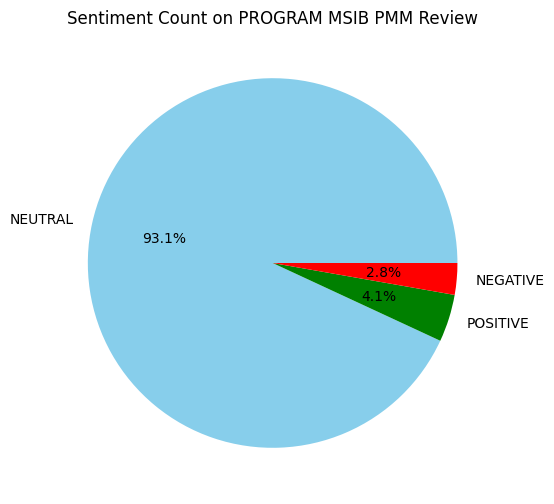

In [16]:
# Menghitung jumlah tiap polaritas
label_counts = df_clean['label'].value_counts()

# Plot diagram batang
plt.figure(figsize=(10, 6))
plt.pie(label_counts.values, labels=label_counts.index, autopct='%1.1f%%', colors=['skyblue', 'green', 'red'])
plt.title('Sentiment Count on PROGRAM MSIB PMM Review')
plt.show()
     

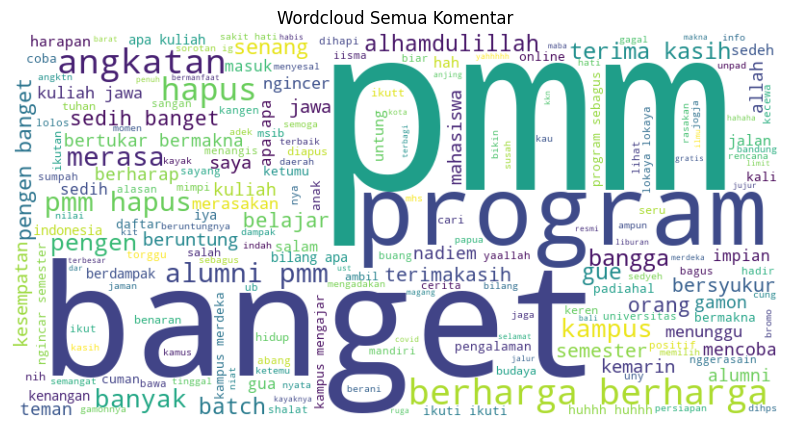

In [17]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Gabungkan semua teks jadi satu
all_text = ' '.join(df_clean['text_akhir'].astype(str))

# Buat wordcloud
wordcloud_all = WordCloud(width=800, height=400, background_color='white').generate(all_text)

# Tampilkan
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_all, interpolation='bilinear')
plt.axis('off')
plt.title('Wordcloud Semua Komentar')
plt.show()

# Simpan WordCloud sebagai gambar
wordcloud_all.to_file("wordcloud_semua_komentar.png")

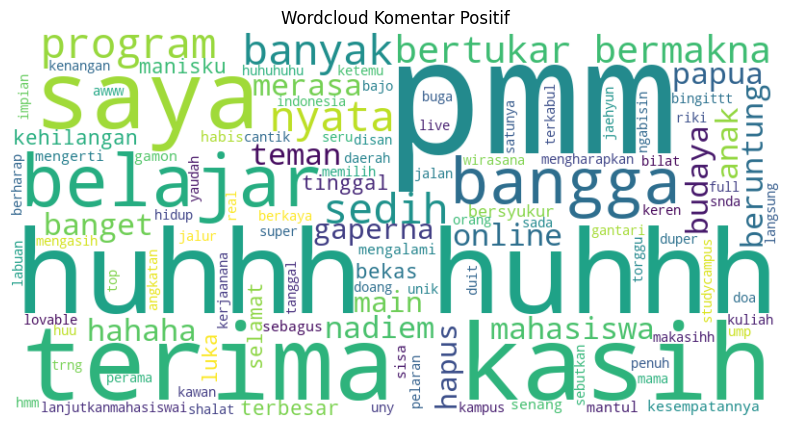

In [18]:
# Wordcloud komentar POSITIF
positive_text = ' '.join(df_clean[df_clean['label'] == 'POSITIVE']['text_akhir'].astype(str))
wordcloud_pos = WordCloud(width=800, height=400, background_color='white').generate(positive_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.axis('off')
plt.title('Wordcloud Komentar Positif')
plt.show()

# Simpan WordCloud sebagai gambar
wordcloud_pos.to_file("wordcloud_komentar_positive.png")

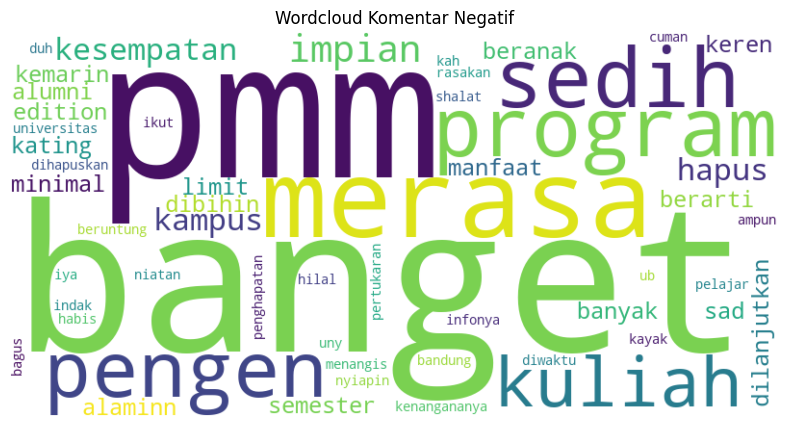

In [19]:
# Wordcloud komentar NEGATIF
negative_text = ' '.join(df_clean[df_clean['label'] == 'NEGATIVE']['text_akhir'].astype(str))
wordcloud_neg = WordCloud(width=800, height=400, background_color='white').generate(negative_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.axis('off')
plt.title('Wordcloud Komentar Negatif')
plt.show()

# Simpan WordCloud sebagai gambar
wordcloud_neg.to_file("wordcloud_komentar_negatif.png")

In [25]:
final_df = df_clean[['text_akhir', 'label']]
final_df.to_csv('hasil_preprocessing.csv', index=False)

In [29]:
final_df.isnull().sum()

text_akhir    0
label         0
dtype: int64

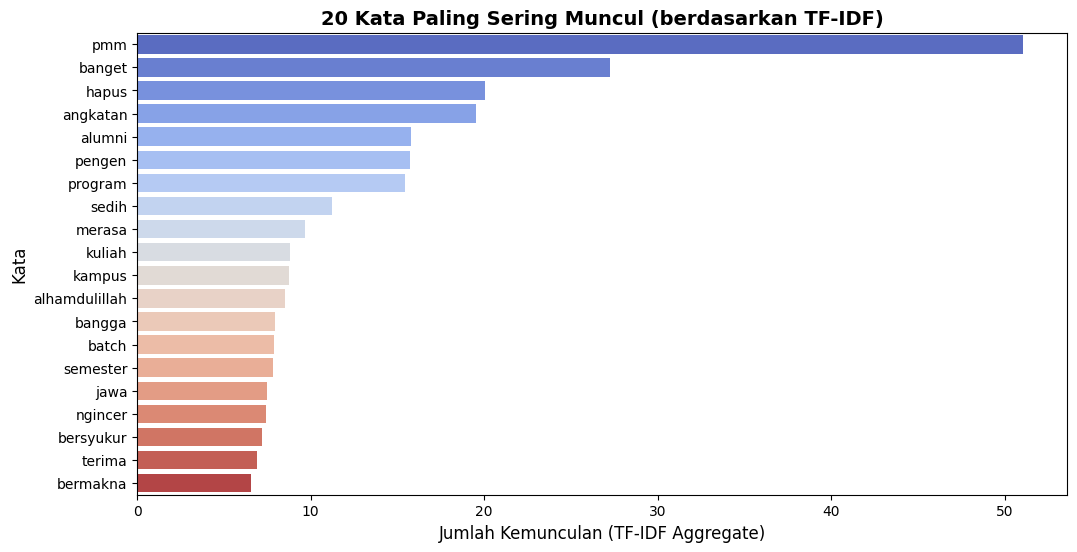

<Figure size 640x480 with 0 Axes>

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
import seaborn as sns

# Gunakan text_akhir hasil preprocessing
text_data = df_clean['text_akhir'].dropna().astype(str)

# TF-IDF Vectorizer
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(text_data)

# Buat DataFrame dari hasil TF-IDF
tfidf_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

# Hitung frekuensi total dari semua kata (bukan bobot TF-IDF)
word_freq = tfidf_df.sum().reset_index(name='jumlah')
word_freq.rename(columns={'index': 'kata'}, inplace=True)

# Urutkan dan ambil 20 kata teratas
word_freq = word_freq.sort_values('jumlah', ascending=False).head(20)

# Buat palet warna
colors = sns.color_palette("coolwarm", len(word_freq))

# Plot frekuensi kata
plt.figure(figsize=(12, 6))
sns.barplot(x='jumlah', y='kata', data=word_freq, palette=colors, hue='kata', dodge=False)

# Hilangkan legend
plt.legend([], [], frameon=False)

# Tambahkan judul dan label
plt.title('20 Kata Paling Sering Muncul (berdasarkan TF-IDF)', fontsize=14, fontweight='bold')
plt.xlabel('Jumlah Kemunculan (TF-IDF Aggregate)', fontsize=12)
plt.ylabel('Kata', fontsize=12)

# Tampilkan plot
plt.show()

plt.savefig("tfidf_top20_kata.png", dpi=300, bbox_inches='tight')


In [21]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder

# 1. Ekstrak teks dan label dari dataframe
texts = df_clean['text_akhir'].astype(str).tolist()
labels = df_clean['label'].astype(str).tolist()  # Pastikan labelnya bertipe string

# 2. Tokenisasi teks
vocab_limit = 2500  # Jumlah maksimal kata dalam vocab
text_tokenizer = Tokenizer(num_words=vocab_limit, oov_token="<OOV>", split=' ')
text_tokenizer.fit_on_texts(texts)

# 3. Ubah teks menjadi urutan angka (integer sequences)
sequences = text_tokenizer.texts_to_sequences(texts)

# 4. Padding agar panjang input seragam
padded_inputs = pad_sequences(sequences, padding='post', truncating='post')

# 5. Encode label (misal: ['positive', 'negative', 'neutral'] -> [2, 0, 1])
label_encoder = LabelEncoder()
numeric_labels = label_encoder.fit_transform(labels)

# Info tambahan: print label mapping jika mau tahu
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Mapping label:", label_mapping)
print("Jumlah input (X):", len(padded_inputs))
print("Jumlah label (y):", len(numeric_labels))


Mapping label: {np.str_('NEGATIVE'): np.int64(0), np.str_('NEUTRAL'): np.int64(1), np.str_('POSITIVE'): np.int64(2)}
Jumlah input (X): 651
Jumlah label (y): 651


In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    padded_inputs, numeric_labels, test_size=0.2, stratify=numeric_labels, random_state=42
)

print("Jumlah data pelatihan:", len(X_train))
print("Jumlah data pengujian:", len(X_test))


Jumlah data pelatihan: 520
Jumlah data pengujian: 131


In [23]:
from imblearn.over_sampling import SMOTE

# Terapkan SMOTE pada data pelatihan
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print("Jumlah sampel pelatihan setelah SMOTE:", len(X_train_resampled))
print("Distribusi kelas setelah SMOTE:", dict(zip(*np.unique(y_train_resampled, return_counts=True))))

Jumlah sampel pelatihan setelah SMOTE: 1452
Distribusi kelas setelah SMOTE: {np.int64(0): np.int64(484), np.int64(1): np.int64(484), np.int64(2): np.int64(484)}
